# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = mouse_metadata.merge(study_results, on = "Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice.
mouse_counts = merged_df['Mouse ID'].unique()
len(mouse_counts)

249

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicated_data

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df['Mouse ID'].isin(duplicated_data) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice in the clean DataFrame.
mouse_counts = clean_df['Mouse ID'].unique()
len(mouse_counts)

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_regimens = clean_df.groupby('Drug Regimen')
mean = drug_regimens['Tumor Volume (mm3)'].mean()
median = drug_regimens['Tumor Volume (mm3)'].median()
variance = drug_regimens['Tumor Volume (mm3)'].var()
standard_dev = drug_regimens['Tumor Volume (mm3)'].std()
sem = drug_regimens['Tumor Volume (mm3)'].sem()

statistics = pd.DataFrame({"Mean Tumor Volume": mean, 
                            "Median Tumor Volume": median,
                            "Variance Tumor Volume": variance, 
                            "Std. Dev. Tumor Volume": standard_dev, 
                            "SEM Tumor Volume": sem})
statistics 

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_regimens = clean_df.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
single_method_df = drug_regimens['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])
single_method_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

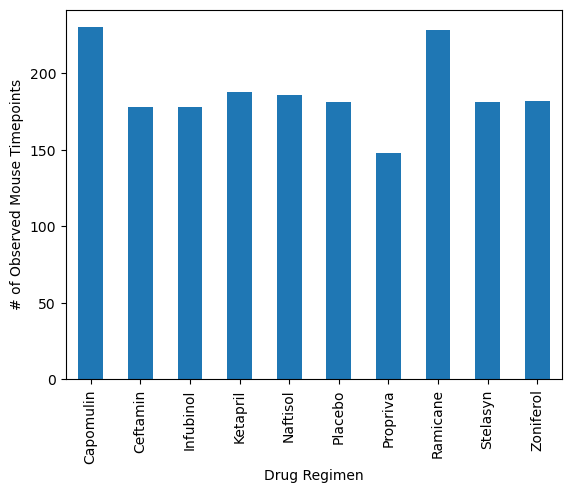

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_of_mice = drug_regimens['Drug Regimen'].value_counts()
number_of_mice.plot.bar(ylabel = '# of Observed Mouse Timepoints', rot = 90)

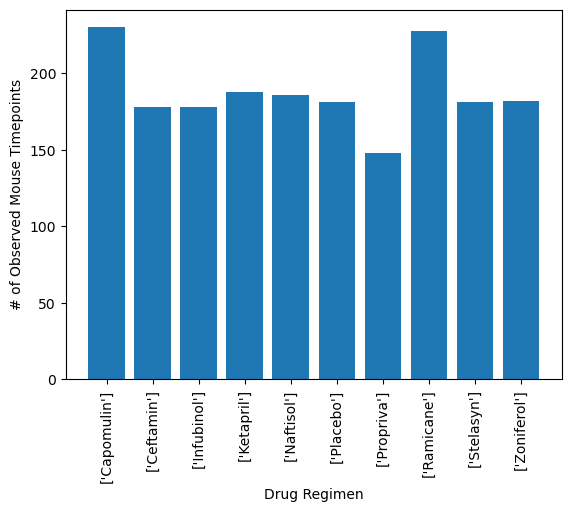

In [109]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_of_mice = drug_regimens['Drug Regimen'].value_counts()
drug_regimen_names = drug_regimens['Drug Regimen'].unique()
plt.bar(drug_regimen_names.astype("string"), number_of_mice)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

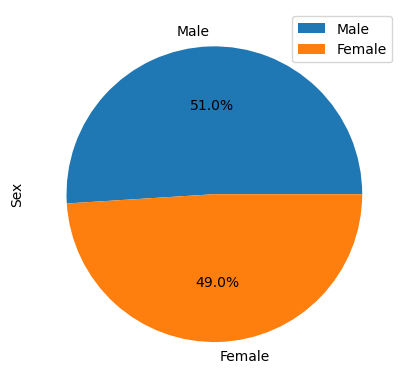

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
number_of_gender = clean_df['Sex'].value_counts()
total_mice_counts = number_of_gender["Male"]  + number_of_gender["Female"]
percent_male = round((number_of_gender["Male"]/ total_mice_counts) * 100, 0)
percent_female = round((number_of_gender["Female"]/ total_mice_counts) * 100, 0)
gender_percentage = pd.DataFrame({'Sex':[percent_male, percent_female]}, index = ['Male', 'Female'])
gender_percentage.plot.pie(y = 'Sex', autopct='%1.1f%%')


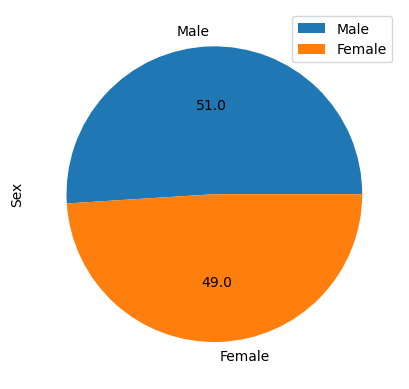

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_percentage_array = [percent_male, percent_female]
labels = 'Male', 'Female'
plt.pie(gender_percentage_array, labels = labels, autopct ='%.1f')
plt.ylabel("Sex")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [275]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(clean_df.groupby("Mouse ID")['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge = clean_df.merge(greatest_timepoint, on = ["Mouse ID","Timepoint"])
timepoint_drug_merge = timepoint_merge.loc[timepoint_merge['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
filtered_timepoint_drug_merge = timepoint_drug_merge['Tumor Volume (mm3)']


In [279]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []
treatment_list = filtered_timepoint_drug_merge.values.tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = filtered_timepoint_drug_merge.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [269]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
